In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [3]:
mydata=pd.read_csv('manhattan.csv')
mydata.info()
mydata.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3539 entries, 0 to 3538
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_id         3539 non-null   int64  
 1   rent              3539 non-null   int64  
 2   bedrooms          3539 non-null   float64
 3   bathrooms         3539 non-null   int64  
 4   size_sqft         3539 non-null   int64  
 5   min_to_subway     3539 non-null   int64  
 6   floor             3539 non-null   float64
 7   building_age_yrs  3539 non-null   int64  
 8   no_fee            3539 non-null   int64  
 9   has_roofdeck      3539 non-null   int64  
 10  has_washer_dryer  3539 non-null   int64  
 11  has_doorman       3539 non-null   int64  
 12  has_elevator      3539 non-null   int64  
 13  has_dishwasher    3539 non-null   int64  
 14  has_patio         3539 non-null   int64  
 15  has_gym           3539 non-null   int64  
 16  neighborhood      3539 non-null   object 


,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


# Klasifikasi

In [4]:
y_data=['no_fee','has_roofdeck','has_washer_dryer','has_doorman','has_elevator','has_dishwasher','has_patio','has_gym']
X=mydata[['rent','bedrooms','bathrooms','size_sqft','floor','building_age_yrs']]
Y=mydata[y_data[4]] #Pilih variabel yang ingin diklasifikasikan pada y_data
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=123)
model=svm.SVC(kernel='linear')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [5]:
#Prediksi
print("Prediksi terhadap variabel",y_data[4],"adalah :",y_pred) #y_data mengikuti berdasarkan variabel yang diinginkan

Prediksi terhadap variabel has_elevator adalah : [0 0 0 ... 0 0 0]


In [6]:
confusion_matrix(y_test,y_pred)[0:5]

array([[736,   1],
       [325,   0]], dtype=int64)

In [7]:
print(classification_report(y_test,y_pred)) #untuk melihat akurasi dari model

              precision    recall  f1-score   support

           0       0.69      1.00      0.82       737
           1       0.00      0.00      0.00       325

    accuracy                           0.69      1062
   macro avg       0.35      0.50      0.41      1062
weighted avg       0.48      0.69      0.57      1062



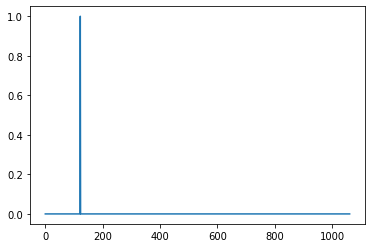

In [9]:
plt.plot(y_pred)

# Regresi

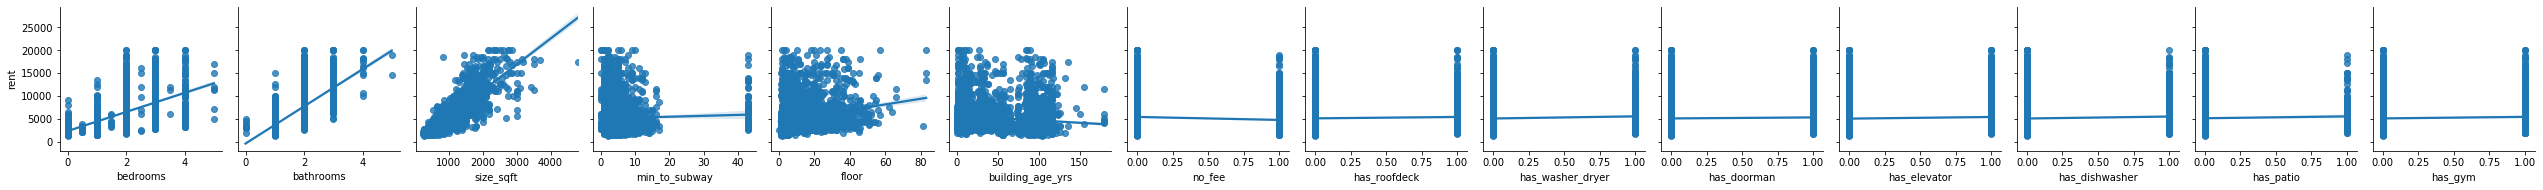

In [3]:
sns.pairplot(mydata,
            x_vars=['bedrooms','bathrooms','size_sqft','min_to_subway','floor','building_age_yrs','no_fee','has_roofdeck','has_washer_dryer','has_doorman','has_elevator','has_dishwasher','has_patio','has_gym'],
            y_vars=['rent'],
            kind='reg')

In [4]:
#Mencari hubungan antara 1 variabel independen dengan variabel dependen yaitu variabel "rent"
vrb=['bedrooms','bathrooms','size_sqft','min_to_subway','floor','building_age_yrs','no_fee','has_roofdeck','has_washer_dryer','has_doorman','has_elevator','has_dishwasher','has_patio','has_gym']
lm=LinearRegression()
y=mydata['rent']
print("Hubungan variabel independen dengan variabel dependen (rent) adalah")
R2=list()
for i in vrb:
    x=mydata[[i]]
    model=lm.fit(x,y)
    A=lm.score(x,y)
    R2.append(A)
    print(i," : ",A)

Hubungan variabel independen dengan variabel dependen (rent) adalah
bedrooms  :  0.40747335445115773
bathrooms  :  0.5920908646036436
size_sqft  :  0.736084484812227
min_to_subway  :  0.0012365116157029288
floor  :  0.046598630236334815
building_age_yrs  :  0.016613892025667654
no_fee  :  0.010301701578443012
has_roofdeck  :  0.0012365986765134895
has_washer_dryer  :  0.0029023190552983635
has_doorman  :  0.000979818308925351
has_elevator  :  0.0026894283610536807
has_dishwasher  :  0.002729149247048257
has_patio  :  0.0008586321336241376
has_gym  :  0.0016490609026894587


In [9]:
xx=mydata.drop(['rental_id','rent','neighborhood','borough'],axis=1)
yy=mydata['rent']
xx_train,xx_test,yy_train,yy_test=train_test_split(xx,yy,test_size=0.3,random_state=0)
data_x_train,var_x_train=xx_train.shape
data_x_test,var_x_test=xx_test.shape
data_y_train=yy_train.shape
data_y_test=yy_test.shape
print("banyaknya data training adalah",data_x_train,"data")
print("banyaknya data test adalah",data_x_test,"data")
print("dengan",var_x_train,"variabel independen dan 1 variabel dependen")

banyaknya data training adalah 2477 data
banyaknya data test adalah 1062 data
dengan 14 variabel independen dan 1 variabel dependen


In [19]:
#Pemodelan
lm2=LinearRegression()
model2=lm2.fit(xx_train,yy_train)
print("model yang didapatkan memiliki koefisien variabel independen adalah")
for i in range(len(vrb)):
    print("koefisien",vrb[i],"adalah",lm2.coef_[i])
print("dengan konstanta atau intercept adalah",lm2.intercept_)

model yang didapatkan memiliki koefisien variabel independen adalah
koefisien bedrooms adalah -337.4424404515653
koefisien bathrooms adalah 1147.7285226828853
koefisien size_sqft adalah 5.021859873261974
koefisien min_to_subway adalah -13.083625566731875
koefisien floor adalah 23.985647589739155
koefisien building_age_yrs adalah -7.138269557639865
koefisien no_fee adalah -96.32914688732018
koefisien has_roofdeck adalah 0.6837716659958998
koefisien has_washer_dryer adalah 87.53519514127197
koefisien has_doorman adalah -85.39673044579853
koefisien has_elevator adalah 138.4316459441309
koefisien has_dishwasher adalah -0.9022018636779521
koefisien has_patio adalah -217.216255070651
koefisien has_gym adalah -16.547453101252948
dengan konstanta atau intercept adalah -510.8163498383674


In [21]:
pred1=lm2.predict(xx_test)
print("kemudian dari model tersebut akan di implementasikan ke data test, sehingga didapat hasil prediksi sebagai berikut \n",pred1)

kemudian dari model tersebut akan di implementasikan ke data test, sehingga didapat hasil prediksi sebagai berikut 
 [ 3631.94070591  6524.7757042   3660.2140815  ...  2446.57927172
 10087.6116637   4516.86294457]


In [24]:
#nilai error prediksi terhadap data aktual
print("presentasi error antara hasil prediksi dengan data aktual sebesar",lm2.score(xx_test,yy_test),"persen")

presentasi error antara hasil prediksi dengan data aktual sebesar 0.7743047767657512 persen


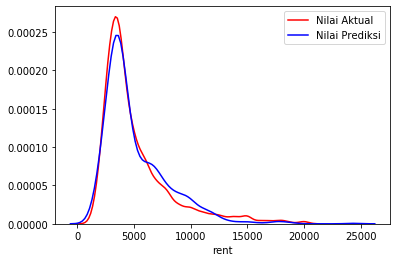

In [25]:
#Plot prediksi dengan data aktual
ax1=sns.distplot(mydata['rent'],hist=False,color='r',label='Nilai Aktual')
sns.distplot(pred1,hist=False,color='b',label='Nilai Prediksi',ax=ax1)